## 꾸러미 가져오기
---
폰트 설치, gpu적용도 했습니다.


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import word2vec
from tqdm.notebook import tqdm
# from tqdm import tqdm_notebook
from konlpy.tag import Mecab
from nltk.translate.bleu_score import sentence_bleu   #bleu 연산
from nltk.translate.bleu_score import SmoothingFunction   #bleu 연산


import re
import os
import io
import time
import random

import seaborn

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm

In [2]:
def init_gpu():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs\n\n")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e, "\n\n")
        
init_gpu()

1 Physical GPUs, 1 Logical GPUs




## 환경설정 및 자료 가져오기
---

In [3]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

print("한글 적용 완료")

한글 적용 완료


In [3]:
!sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
The following additional packages will be installed:
  dh-python libcurl4 libexpat1-dev libpython3-dev libpython3.6
  libpython3.6-dev libpython3.6-minimal libpython3.6-stdlib
  openjdk-8-jdk-headless openjdk-8-jre openjdk-8-jre-headless python-pip-whl
  python3-asn1crypto python3-cffi-backend python3-crypto python3-cryptography
  python3-distutils python3-keyring python3-keyrings.alt python3-lib2to3
  python3-secretstorage python3-setuptools python3-wheel python3-xdg python3.6
  python3.6-dev python3.6-minimal
Suggested packages:
  openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic python-crypto-doc python-cryptography-doc
  python3-cryptography-vectors gnome-keyring libkf5wallet-bin
  gir1.2-gnomekeyring-1.0 python-secretst

In [34]:
!python3 -m pip install --upgrade pip

In [4]:
!python3 -m pip install konlpy # python 3.x

In [35]:
!sudo apt-get install curl git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.13).
git is already the newest version (1:2.17.1-1ubuntu0.8).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [5]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [43]:
!pip install --upgrade gensim==3.8.3

     |████████████████████████████████| 24.2 MB 87 kB/s              
  Attempting uninstall: gensim
    Found existing installation: gensim 4.0.1
    Uninstalling gensim-4.0.1:
      Successfully uninstalled gensim-4.0.1


word2vec 터미널 받기 시도..실행하지 마시오(실패)

In [11]:
# https://drive.google.com/open?id=0B0ZXk88koS2KbDhXdWg1Q2RydlU

--2022-01-12 07:53:46--  https://github.com/Kyubyong/wordvectors/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Kyubyong/wordvectors/zip/refs/heads/master [following]
--2022-01-12 07:53:46--  https://codeload.github.com/Kyubyong/wordvectors/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘./data/master.zip’

master.zip              [ <=>                ]   9.23K  --.-KB/s    in 0.001s  

2022-01-12 07:53:46 (16.4 MB/s) - ‘./data/master.zip’ saved [9454]



In [23]:
!wget https://raw.githubusercontent.com/AnimMouse/gdrive-binaries/master/linux/gdrive-linux-x64

--2022-01-13 07:30:26--  https://raw.githubusercontent.com/AnimMouse/gdrive-binaries/master/linux/gdrive-linux-x64
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7805504 (7.4M) [application/octet-stream]
Saving to: ‘gdrive-linux-x64’

gdrive-linux-x64    100%[===================>]   7.44M  --.-KB/s    in 0.03s   

2022-01-13 07:30:26 (221 MB/s) - ‘gdrive-linux-x64’ saved [7805504/7805504]



In [24]:
!mv gdrive-linux-x64 gdrive

In [25]:
!chmod +x gdrive

In [26]:
!./gdrive about

Authentication needed
Go to the following url in your browser:
https://accounts.google.com/o/oauth2/auth?access_type=offline&client_id=367116221053-7n0vf5akeru7on6o2fjinrecpdoe99eg.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=state

Enter verification code: ^C


In [29]:
!./wordvectors-master/make_wordvectors.sh

./wordvectors-master/make_wordvectors.sh: line 13: unexpected EOF while looking for matching ``'
./wordvectors-master/make_wordvectors.sh: line 29: syntax error: unexpected end of file


In [35]:
#"https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view?usp=sharing&resourcekey=0-Dq9yyzwZxAqT3J02qvnFwg"

FILEID="0B0ZXk88koS2KbDhXdWg1Q2RydlU"
FILENAME="word2vec.zip"
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILEID}' -O {FILENAME}


--2022-01-12 09:03:51--  https://docs.google.com/uc?export=download&id=0B0ZXk88koS2KbDhXdWg1Q2RydlU
Resolving docs.google.com (docs.google.com)... 172.217.15.110, 2607:f8b0:4004:814::200e
Connecting to docs.google.com (docs.google.com)|172.217.15.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘word2vec.zip’

word2vec.zip            [ <=>                ]   3.17K  --.-KB/s    in 0s      

2022-01-12 09:03:51 (35.8 MB/s) - ‘word2vec.zip’ saved [3250]



진행이 안 되서 접고 그냥 업로드 했습니다.

In [29]:
#!unzip ./data/ko.zip -d data/

Archive:  ./data/ko.zip
  inflating: data/ko.bin             
  inflating: data/ko.tsv             


## 자료 가져오기 재개
---

In [4]:
workspace_path = os.getenv('HOME')+'/aiffel/gd_transformer_chatbot'
data_path = os.getenv('HOME')+'/aiffel/gd_transformer_chatbot/data'

In [5]:
data = pd.read_csv(data_path+'/ChatbotData .csv')
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


In [7]:
data[data['label']==0][:10]

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
5,SD카드 망가졌어,다시 새로 사는 게 마음 편해요.,0
6,SD카드 안돼,다시 새로 사는 게 마음 편해요.,0
7,SNS 맞팔 왜 안하지ㅠㅠ,잘 모르고 있을 수도 있어요.,0
8,SNS 시간낭비인 거 아는데 매일 하는 중,시간을 정하고 해보세요.,0
9,SNS 시간낭비인데 자꾸 보게됨,시간을 정하고 해보세요.,0


In [8]:
data[data['label']==1][:10]

,Q,A,label
5290,1000일 만난 여자친구와 이별,더 오래 만날 사람 만날 거예요.,1
5291,10년 연애. 헤어졌습니다.,더 공허함이 크시겠네요.,1
5292,10년 연애사 되돌아보니 다 부질없네,더 좋은 사람 만나실 거예요.,1
5293,10년 연예의끝,더 마음이 허하겠어요.,1
5294,10년만나다 헤어지네,충분히 슬퍼하고 충분히 아파하다가 이겨내세요.,1
5295,10년이라는 시간이 참 무색하다 싶네,함께 걸은 길을 혼자 돌아가고 계시겠네요.,1
5296,10월의 마지막밤 . 더 보고싶네 그사람,이별은 보고 싶은 마음을 참는 과정이죠.,1
5297,14년된 여자친구랑 이별,충분히 슬퍼하고 충분히 아파하다가 이겨내세요.,1
5298,14년의 기나긴 이야기.,좋은 연애였길 바라요.,1
5299,15년…안녕,시간이 무색하네요.,1


In [9]:
data[data['label']==2][:10]

,Q,A,label
8860,짝사랑만큼 고통스러운 건 없겠지.,짝사랑 만큼 감정소모가 큰 건 없을 거예요.,2
8861,1년 넘게 만났는데 지금도 불타올라,정열적인 사랑을 하고 있나봐요.,2
8862,1년 동거 중인데 계속 좋아,서로 깊게 알게되면서 더 좋아졌나봅니다.,2
8863,1년 동거하고 결혼했어,축하합니다!,2
8864,1년 만났는데도 그 사람에 대해 잘 모르겠어,더 만나보세요.,2
8865,1년반 만났는데 결혼하자고 해도 될까?,기다리고 있을지도 몰라요.,2
8866,1년째 동거중이야,서로 알아가는 단계인가봐요.,2
8867,1년째 좋아하는 사람이 있어.,힘든 시간이었겠어요.,2
8868,2년 가량의 연애,딱 잘 만났네요.,2
8869,2년 만났는데도 잘 모르는 부분이 많은 거 같아,양파같은 사람이네요.,2


In [10]:
data[data['label']==3][:5]

,Q,A,label


0 = 사랑외의 것\
1 = 사랑 끝난 것\
2 = 사랑 진행 중

## 자료 전처리
---

In [11]:
data.isnull().sum()

Q        0
A        0
label    0
dtype: int64

In [12]:
data[data['Q'].duplicated()]

,Q,A,label
196,고양이 키우고 싶어,가족들과 상의해보세요.,0
235,공시 준비 힘들어,잘 될 거예요.,0
1294,돈 벌고 싶어,많이 벌수록 좋아요.,0
1445,로또 번호 알려줘,알면 제가 하죠.,0
1481,마음이 울적해,거리를 걸어보세요.,0
...,...,...,...
11642,착해서 잘해주는 건지 좋아하는 건지,헷갈린다고 말해보세요.,2
11649,첫 눈에 반하는게 가능해?,당연히 가능하죠.,2
11658,첫사랑 생각나,지금의 사랑에 충실하세요.,2
11732,커플여행이 나을까 그냥 우리끼리 갈까?,저는 둘이 가는 게 좋아요.,2


In [13]:
data[data['Q'][11819]==data['Q']]

,Q,A,label
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2


In [14]:
data = data.drop_duplicates(['Q'])
data[data['Q'].duplicated()]

,Q,A,label


In [15]:
data[data['A'].duplicated()]

,Q,A,label
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
6,SD카드 안돼,다시 새로 사는 게 마음 편해요.,0
9,SNS 시간낭비인데 자꾸 보게됨,시간을 정하고 해보세요.,0
12,가끔 뭐하는지 궁금해,그 사람도 그럴 거예요.,0
18,가스불 켜놓고 나온거 같아,빨리 집에 돌아가서 끄고 나오세요.,0
...,...,...,...
11806,혼자만 설레고 혼자서 끝내는 짝사랑 그만할래.,맘고생 많았어요.,2
11807,화이트데이에 고백할까요?,선물을 주면서 솔직하고 당당하게 고백해보세요.,2
11809,확실히 날 좋아하는 걸 아는 남자랑 친구가 될 수 있을까?,그 사람을 위해서는 그러면 안돼요.,2
11816,회식하는데 나만 챙겨줘. 썸임?,호감이 있을 수도 있어요. 그렇지만 조금 더 상황을 지켜보세요.,2


In [16]:
data[data['A'][11822]==data['A']]

,Q,A,label
9062,그냥 결혼이나 할까?,도피성 결혼은 하지 않길 바라요.,2
11822,힘들어서 결혼할까봐,도피성 결혼은 하지 않길 바라요.,2


In [17]:
data = data.drop_duplicates(['A'])
data[data['A'].duplicated()]

,Q,A,label


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7731 entries, 0 to 11821
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       7731 non-null   object
 1   A       7731 non-null   object
 2   label   7731 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 241.6+ KB


In [19]:
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    sentence = re.sub(r"([0-9?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Zㄱ-ㅎ가-힣0-9?.!,]+", " ", sentence)
    sentence = sentence.strip()
    return sentence

In [20]:
data['Q'] = data['Q'].apply(preprocess_sentence)
data['A'] = data['A'].apply(preprocess_sentence)

display(data.head())

,Q,A,label
0,1 2 시 땡 !,하루가 또 가네요 .,0
1,1 지망 학교 떨어졌어,위로해 드립니다 .,0
2,3 박 4 일 놀러가고 싶다,여행은 언제나 좋죠 .,0
4,ppl 심하네,눈살이 찌푸려지죠 .,0
5,sd카드 망가졌어,다시 새로 사는 게 마음 편해요 .,0


## 조각화(tokenize)
---

문장 평균길이 : 질문 14.113956797309534, 답변 16.639632647781657
문장 최대길이 : 질문 57, 답변 78
문장 최소길이 : 질문 1, 답변 1


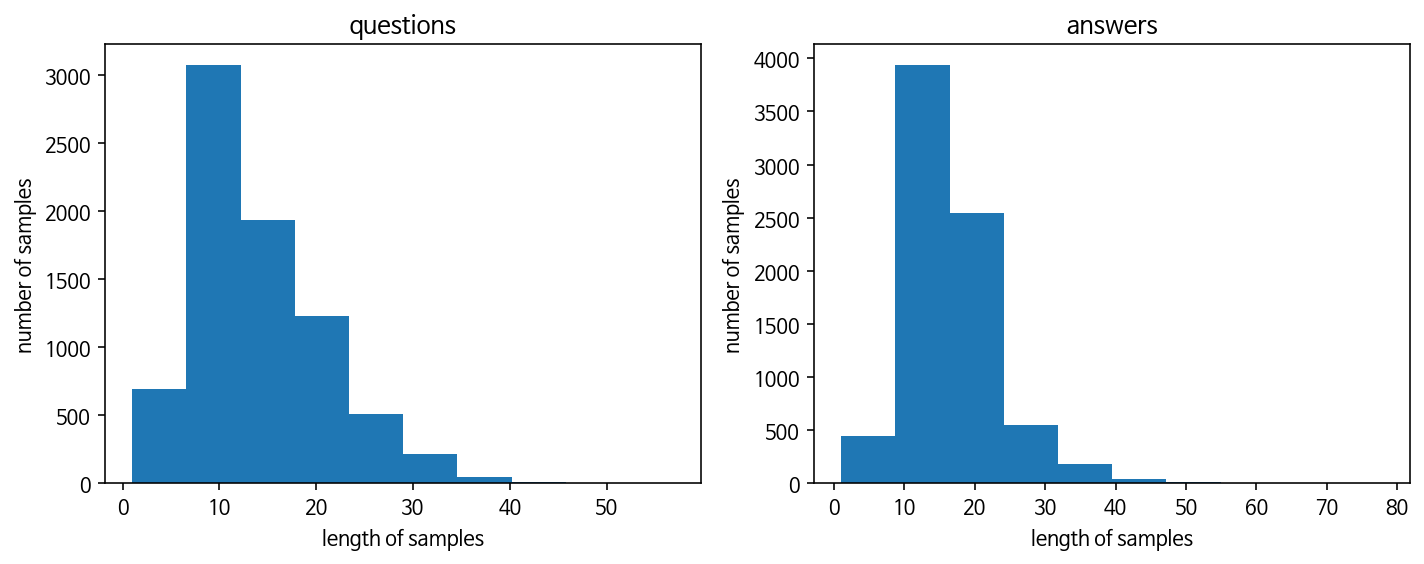

In [21]:
num_questions = np.array([len(n) for n in data['Q']])
num_answers = np.array([len(n) for n in data['A']])

print(f'문장 평균길이 : 질문 {np.mean(num_questions)}, 답변 {np.mean(num_answers)}')
print(f'문장 최대길이 : 질문 {np.max(num_questions)}, 답변 {np.max(num_answers)}')
print(f'문장 최소길이 : 질문 {np.min(num_questions)}, 답변 {np.min(num_answers)}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(num_questions)
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
ax1.set_title('questions')

ax2.hist(num_answers)
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
ax2.set_title('answers')

plt.tight_layout()
plt.show()


문장 최대길이 25로 결정

In [22]:
max_len = 25

In [23]:
def tokenize(src_corpus, tgt_corpus, max_len):
    mecab = Mecab()
    src_morpheme = [ mecab.morphs(sen) for sen in src_corpus ]
    tgt_morpheme = [ mecab.morphs(sen) for sen in tgt_corpus ]
    
    combined_morpheme = [(src, tgt) for src, tgt in zip(src_morpheme, tgt_morpheme)
                          if len(src) <= max_len and len(tgt) <= max_len ]
    
    src_morpheme = [ sen for sen, _ in combined_morpheme ]
    tgt_morpheme = [ sen for _, sen in combined_morpheme ]
    
    return src_morpheme, tgt_morpheme

In [24]:
question_token, answer_token = tokenize(data['Q'], data['A'], max_len)

In [25]:
print(len(question_token), len(answer_token))
# len(answer_token)

7701 7701


In [26]:
question_token[:5]

[['1', '2', '시', '땡', '!'],
 ['1', '지망', '학교', '떨어졌', '어'],
 ['3', '박', '4', '일', '놀', '러', '가', '고', '싶', '다'],
 ['ppl', '심하', '네'],
 ['sd', '카드', '망가졌', '어']]

## 자료 증강(Augmentation)
---

In [27]:
w2v = word2vec.Word2Vec.load(data_path + '/ko.bin')

In [28]:
# for sample_tokens in answer_token[:3]:
#     selected_tok = random.choice(sample_tokens)
    
#     result = [ w2v.wv.most_similar(tok)[0][0] if tok is selected_tok else '<'+ tok + '>' for tok in sample_tokens ]
#     print(f'from : {" ".join(sample_tokens)}')
#     print(f'to   : {" ".join(result)}\n')

In [29]:
def lexical_sub(sentence_arr, wv):
    try:
        i = np.random.randint(len(sentence_arr))
        res = sentence_arr[::]
        res[i] = wv.most_similar(sentence_arr[i])[0][0]

    except:   # 단어장에 없는 단어
        return None

    return res

In [30]:
def augment_corpus(src_corpus, tgt_corpus, wv):
    new_src_corpus = []
    new_tgt_corpus = []
    corpus_size = len(src_corpus)
    
    for i in tqdm(range(corpus_size)):
        old_src_sen = src_corpus[i]
        old_tgt_sen = tgt_corpus[i]
        
        new_src_sen = lexical_sub(old_src_sen, wv)
        new_tgt_sen = lexical_sub(old_tgt_sen, wv)

        if new_src_sen :
            new_src_corpus.append(new_src_sen)
            new_tgt_corpus.append(old_tgt_sen)
        
        if new_tgt_sen:
            new_src_corpus.append(old_src_sen)
            new_tgt_corpus.append(new_tgt_sen)
    
    return new_src_corpus, new_tgt_corpus

In [31]:
token_que_more, token_ans_more = augment_corpus(question_token, answer_token, w2v.wv)

  0%|          | 0/7701 [00:00<?, ?it/s]

In [32]:
len(token_que_more), len(token_ans_more)

(13401, 13401)

In [33]:
token_que_more[:5]

[['1', '2', '시', '땡', '!'],
 ['1', '지망', '학교의', '떨어졌', '어'],
 ['1', '지망', '학교', '떨어졌', '어'],
 ['3', '박', '4', '일', '놀', '러', '놀드', '고', '싶', '다'],
 ['3', '박', '4', '일', '놀', '러', '가', '고', '싶', '다']]

In [34]:
token_que_plus, token_ans_plus = augment_corpus(token_que_more, 
                                                          token_ans_more, 
                                                          w2v.wv)

  0%|          | 0/13401 [00:00<?, ?it/s]

In [35]:
len(token_que_plus), len(token_ans_plus)

(23715, 23715)

In [36]:
que_corpus_augmented = question_token + token_que_more + token_que_plus
ans_corpus_augmented = answer_token + token_ans_more + token_ans_plus

In [37]:
len(que_corpus_augmented), len(ans_corpus_augmented)

(44817, 44817)

In [38]:
for i in range(5):
    print(f'질: {que_corpus_augmented[i]}')
    print(f'답: {ans_corpus_augmented[i]}')
    print()

질: ['1', '2', '시', '땡', '!']
답: ['하루', '가', '또', '가', '네요', '.']

질: ['1', '지망', '학교', '떨어졌', '어']
답: ['위로', '해', '드립니다', '.']

질: ['3', '박', '4', '일', '놀', '러', '가', '고', '싶', '다']
답: ['여행', '은', '언제나', '좋', '죠', '.']

질: ['ppl', '심하', '네']
답: ['눈살', '이', '찌푸려', '지', '죠', '.']

질: ['sd', '카드', '망가졌', '어']
답: ['다시', '새로', '사', '는', '게', '마음', '편해요', '.']



In [39]:
start_token = ['<start>']
end_token = ['<end>']
ans_corpus_augmented = [ start_token + sen + end_token for sen in ans_corpus_augmented ]

In [40]:
que_corpus_augmented = [ " ".join(sen) for sen in que_corpus_augmented ]
ans_corpus_augmented = [ " ".join(sen) for sen in ans_corpus_augmented ]

## 정수로 부호화(encoding) 및 조각 처리
---

In [41]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
                    filters="",
                    oov_token='<unk>')
tokenizer.fit_on_texts(que_corpus_augmented + ans_corpus_augmented)
tokenizer.index_word.update({ 0 : '<pad>'})
index_word = tokenizer.index_word
word_index = { w: i for i, w in index_word.items() }

In [42]:
list(index_word.items())[:5]

[(1, '<unk>'), (2, '.'), (3, '<start>'), (4, '<end>'), (5, '이')]

In [43]:
VOCAB_SIZE = len(index_word)
VOCAB_SIZE

7708

In [44]:
enc_tensor = tokenizer.texts_to_sequences(que_corpus_augmented)
dec_tensor = tokenizer.texts_to_sequences(ans_corpus_augmented)

In [45]:
enc_tensor = tf.keras.preprocessing.sequence.pad_sequences(enc_tensor, 
                                                           padding='post',
                                                           maxlen=max_len)
dec_tensor = tf.keras.preprocessing.sequence.pad_sequences(dec_tensor, 
                                                           padding='post',
                                                           maxlen=max_len)

In [46]:
enc_train, enc_val, dec_train, dec_val = train_test_split(enc_tensor, 
                                                          dec_tensor, 
                                                          test_size=0.01)
enc_train.shape, enc_val.shape, dec_train.shape, dec_val.shape

((44368, 25), (449, 25), (44368, 25), (449, 25))

## 모형(model) 구성
---

트랜스포머 모델 함수들

In [47]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table

In [48]:
def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_causality_mask(src_len, tgt_len):
    mask = 1 - np.cumsum(np.eye(src_len, tgt_len), 0)
    return tf.cast(mask, tf.float32)

def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_mask = generate_padding_mask(tgt)

    dec_causality_mask = generate_causality_mask(tgt.shape[1], tgt.shape[1])
    dec_mask = tf.maximum(dec_mask, dec_causality_mask)

    dec_enc_causality_mask = generate_causality_mask(tgt.shape[1], src.shape[1])
    dec_enc_mask = tf.maximum(enc_mask, dec_enc_causality_mask)

    return enc_mask, dec_enc_mask, dec_mask

In [49]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        self.depth = d_model // self.num_heads

        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)

        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        QK = tf.matmul(Q, K, transpose_b=True)

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None:
            scaled_qk += (mask * -1e9)  

        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        out = tf.matmul(attentions, V)

        return out, attentions


    def split_heads(self, x):
        bsz = x.shape[0]
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])

        return split_x

    def combine_heads(self, x):
        bsz = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))

        return combined_x


    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)

        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)

        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask)

        out = self.combine_heads(out)
        out = self.linear(out)

        return out, attention_weights

In [50]:
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.d_model = d_model
        self.d_ff = d_ff

        self.fc1 = tf.keras.layers.Dense(d_ff, activation='relu')
        self.fc2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.fc1(x)
        out = self.fc2(out)

        return out

In [51]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, mask):

        """
        Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.do(out)
        out += residual

        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, enc_attn

In [52]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, enc_out, causality_mask, padding_mask):

        """
        Masked Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.do(out)
        out += residual

        """
        Multi-Head Attention
        """
        residual = out
        out = self.norm_2(out)
        out, dec_enc_attn = self.dec_self_attn(out, enc_out, enc_out, causality_mask)
        out = self.do(out)
        out += residual

        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, dec_attn, dec_enc_attn

In [53]:
class Encoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) 
                        for _ in range(n_layers)]

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, mask):
        out = x

        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)

        return out, enc_attns

In [54]:
class Decoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) 
                            for _ in range(n_layers)]


    def call(self, x, enc_out, causality_mask, padding_mask):
        out = x

        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = \
            self.dec_layers[i](out, enc_out, causality_mask, padding_mask)

            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)

        return out, dec_attns, dec_enc_attns

In [55]:
class Transformer(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    src_vocab_size,
                    tgt_vocab_size,
                    pos_len,
                    dropout=0.2,
                    shared_fc=True,
                    shared_emb=False):
        super(Transformer, self).__init__()
        
        self.d_model = tf.cast(d_model, tf.float32)

        if shared_emb:
            self.enc_emb = self.dec_emb = \
            tf.keras.layers.Embedding(src_vocab_size, d_model)
        else:
            self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
            self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.do = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared_fc = shared_fc

        if shared_fc:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]

        out = emb(x)

        if self.shared_fc: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)

        return out


    def call(self, enc_in, dec_in, enc_mask, causality_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)

        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, causality_mask, dec_mask)

        logits = self.fc(dec_out)

        return logits, enc_attns, dec_attns, dec_enc_attns

### 초매개변수(hyperparameter)
---

In [56]:
hyp = {
    'n_layers' : 2,
    'd_model' : 512,
    'n_heads' : 8,
    'd_ff' : 2048,
    'src_vocab_size' : len(word_index),
    'tgt_vocab_size' : len(word_index),
    'pos_len' : 200,
    'dropout' : 0.3,
    'shared_fc' : True,
    'shared_emb' : True
}

## 모형(model) 훈련
---
트랜스포머훈련용 함수들

In [57]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()

        self.d_model = d_model
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)

        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

In [58]:
learning_rate = LearningRateScheduler(hyp['d_model'])

optimizer = tf.keras.optimizers.Adam(learning_rate,
                                        beta_1=0.9,
                                        beta_2=0.98, 
                                        epsilon=1e-9)

In [59]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [60]:
@tf.function()
def train_step(src, tgt, model, optimizer):
    tgt_in = tgt[:, :-1]  # Decoder의 input
    gold = tgt[:, 1:]     # Decoder의 output과 비교하기 위해 right shift를 통해 생성한 최종 타겟

    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt_in)

    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(src, tgt_in, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss, enc_attns, dec_attns, dec_enc_attns

In [61]:
def evaluate(sentence, model, src_tokenizer, tgt_tokenizer, bos_id, eos_id):
    sentence = preprocess_sentence(sentence)
    
    mecab = Mecab()
    pieces = mecab.morphs(sentence)
    tokens = src_tokenizer.texts_to_sequences([" ".join(pieces)])[0]

    _input = tf.keras.preprocessing.sequence.pad_sequences([tokens],
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')
    
    ids = []
    output = tf.expand_dims([bos_id], 0)
    for i in range(dec_train.shape[-1]):
        enc_padding_mask, combined_mask, dec_padding_mask = \
        generate_masks(_input, output)

        predictions, enc_attns, dec_attns, dec_enc_attns =\
        model(_input, 
              output,
              enc_padding_mask,
              combined_mask,
              dec_padding_mask)

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0, -1]).numpy().item()

        if eos_id == predicted_id:
            result = tgt_tokenizer.sequences_to_texts([ids])
            return pieces, result, enc_attns, dec_attns, dec_enc_attns

        ids.append(predicted_id)
        output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)

    result = tgt_tokenizer.sequences_to_texts([ids])[0]

    return pieces, result, enc_attns, dec_attns, dec_enc_attns

In [62]:
def translate(sentence, model, src_tokenizer, tgt_tokenizer, bos_id, eos_id):
    pieces, result, enc_attns, dec_attns, dec_enc_attns = evaluate(sentence, 
                                                                   model, 
                                                                   src_tokenizer, 
                                                                   tgt_tokenizer,
                                                                   bos_id,
                                                                   eos_id)
    print(f'질 : {sentence}')
    print(f'답 : {result[0]}')
    return result

In [63]:
def train(transformer, optimizer, enc_train, dec_train, 
          enc_tokenizer, dec_tokenizer, 
          samples, sampling_period=5, BATCH_SIZE=256, EPOCHS=20,
          bos_id=3, eos_id=4):
    losses = []
    for epoch in range(EPOCHS):
        total_loss = 0

        idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
        random.shuffle(idx_list)
        t = tqdm(idx_list)

        for (batch, idx) in enumerate(t):
            batch_loss, enc_attns, dec_attns, dec_enc_attns = \
            train_step(enc_train[idx:idx+BATCH_SIZE],
                        dec_train[idx:idx+BATCH_SIZE],
                        transformer,
                        optimizer)

            total_loss += batch_loss

            t.set_description_str('Epoch %2d' % (epoch + 1))
            t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
            
        if (epoch + 1) % sampling_period == 0:
            print(f'[EPOCH = {epoch+1}]')
            
            for sample in samples:
                translate(sample, transformer, enc_tokenizer, dec_tokenizer,
                          bos_id, eos_id)
                
        losses.append(total_loss.numpy())
    return losses

학습 확인용 함수

In [64]:
def show_train_loss(losses):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(losses)
    ax.set_title('Traina loss', fontsize=15)
    plt.show()

In [65]:
def print_result(model, src_tokenizer, tgt_tokenizer, sentences,
                n_layers=2, d_model=512, n_heads=8, d_ff=2048, dropout=0.1,
                warmup_steps=4000, batch_size=256, epochs=20):
    
    print("질")
    for i, sen in enumerate(sentences):
        print(f"{i+1}. {sen}")
    print()
    
    print("답")
    for i, sentence in enumerate(sentences):
        pieces, result, enc_attns, dec_attns, dec_enc_attns = \
            evaluate(sentence, model, src_tokenizer, tgt_tokenizer, 3, 4)
        print(f"{i+1}. {result[0]}")
    
    print()
    print('Hyperparameters')
    print(f'n_layers: {n_layers}')
    print(f'd_model: {d_model}')
    print(f'n_heads: {n_heads}')
    print(f'd_ff: {d_ff}')
    print(f'dropout: {dropout}')
    
    print()
    print('Training Parameters')
    print(f'Warmup Steps: {warmup_steps}')
    print(f'Batch Size: {batch_size}')
    print(f'Epoch At: {epochs}')

최종결과 확인용 함수

In [66]:
def calc_prob(src_ids, tgt_ids, model):
    enc_padding_mask, combined_mask, dec_padding_mask = \
    generate_masks(src_ids, tgt_ids)

    predictions, enc_attns, dec_attns, dec_enc_attns =\
    model(src_ids, 
            tgt_ids,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask)
    
    return tf.math.softmax(predictions, axis=-1)

In [67]:
def beam_search_decoder(sentence, 
                        src_len,
                        tgt_len,
                        model,
                        src_tokenizer,
                        tgt_tokenizer,
                        beam_size):
    sentence = preprocess_sentence(sentence)

    pieces = src_tokenizer.encode_as_pieces(sentence)
    tokens = src_tokenizer.encode_as_ids(sentence)

    src_in = tf.keras.preprocessing.sequence.pad_sequences([tokens],
                                                            maxlen=src_len,
                                                            padding='post')

    pred_cache = np.zeros((beam_size * beam_size, tgt_len), dtype=np.long)
    pred = np.zeros((beam_size, tgt_len), dtype=np.long)

    eos_flag = np.zeros((beam_size, ), dtype=np.long)
    scores = np.ones((beam_size, ))

    pred[:, 0] = tgt_tokenizer.bos_id()

    dec_in = tf.expand_dims(pred[0, :1], 0)
    prob = calc_prob(src_in, dec_in, model)[0, -1].numpy()

    for seq_pos in range(1, tgt_len):
        score_cache = np.ones((beam_size * beam_size, ))

        # init
        for branch_idx in range(beam_size):
            cache_pos = branch_idx*beam_size

            score_cache[cache_pos:cache_pos+beam_size] = scores[branch_idx]
            pred_cache[cache_pos:cache_pos+beam_size, :seq_pos] = \
            pred[branch_idx, :seq_pos]

        for branch_idx in range(beam_size):
            cache_pos = branch_idx*beam_size

            if seq_pos != 1:   # 모든 Branch를 로 시작하는 경우를 방지
                dec_in = pred_cache[branch_idx, :seq_pos]
                dec_in = tf.expand_dims(dec_in, 0)

                prob = calc_prob(src_in, dec_in, model)[0, -1].numpy()

            for beam_idx in range(beam_size):
                max_idx = np.argmax(prob)

                score_cache[cache_pos+beam_idx] *= prob[max_idx]
                pred_cache[cache_pos+beam_idx, seq_pos] = max_idx

                prob[max_idx] = -1

        for beam_idx in range(beam_size):
            if eos_flag[beam_idx] == -1: continue

            max_idx = np.argmax(score_cache)
            prediction = pred_cache[max_idx, :seq_pos+1]

            pred[beam_idx, :seq_pos+1] = prediction
            scores[beam_idx] = score_cache[max_idx]
            score_cache[max_idx] = -1

            if prediction[-1] == tgt_tokenizer.eos_id():
                eos_flag[beam_idx] = -1

    return pred

In [68]:
def calculate_bleu(reference, candidate, weights=[0.25, 0.25, 0.25, 0.25]):
    return sentence_bleu(
        [reference],
        candidate,
        weights=weights,
        smoothing_function=SmoothingFunction().method1
    )

In [97]:
def beam_search_decoder(sentence, 
                        src_len,
                        tgt_len,
                        model,
                        src_tokenizer,
                        tgt_tokenizer,
                        beam_size):
#     sentence = preprocess_sentence(sentence)

    pieces = src_tokenizer.encode_as_pieces(sentence)
    tokens = src_tokenizer.encode_as_ids(sentence)

    src_in = tf.keras.preprocessing.sequence.pad_sequences([tokens],
                                                            maxlen=src_len,
                                                            padding='post')

    pred_cache = np.zeros((beam_size * beam_size, tgt_len), dtype=np.long)
    pred = np.zeros((beam_size, tgt_len), dtype=np.long)

    eos_flag = np.zeros((beam_size, ), dtype=np.long)
    scores = np.ones((beam_size, ))

    pred[:, 0] = tgt_tokenizer.bos_id()

    dec_in = tf.expand_dims(pred[0, :1], 0)
    prob = calc_prob(src_in, dec_in, model)[0, -1].numpy()

    for seq_pos in range(1, tgt_len):
        score_cache = np.ones((beam_size * beam_size, ))

        # init
        for branch_idx in range(beam_size):
            cache_pos = branch_idx*beam_size

            score_cache[cache_pos:cache_pos+beam_size] = scores[branch_idx]
            pred_cache[cache_pos:cache_pos+beam_size, :seq_pos] = \
            pred[branch_idx, :seq_pos]

        for branch_idx in range(beam_size):
            cache_pos = branch_idx*beam_size

            if seq_pos != 1:   # 모든 Branch를 로 시작하는 경우를 방지
                dec_in = pred_cache[branch_idx, :seq_pos]
                dec_in = tf.expand_dims(dec_in, 0)

                prob = calc_prob(src_in, dec_in, model)[0, -1].numpy()

            for beam_idx in range(beam_size):
                max_idx = np.argmax(prob)

                score_cache[cache_pos+beam_idx] *= prob[max_idx]
                pred_cache[cache_pos+beam_idx, seq_pos] = max_idx

                prob[max_idx] = -1

        for beam_idx in range(beam_size):
            if eos_flag[beam_idx] == -1: continue

            max_idx = np.argmax(score_cache)
            prediction = pred_cache[max_idx, :seq_pos+1]

            pred[beam_idx, :seq_pos+1] = prediction
            scores[beam_idx] = score_cache[max_idx]
            score_cache[max_idx] = -1

            if prediction[-1] == tgt_tokenizer.eos_id():
                eos_flag[beam_idx] = -1

    return pred

In [100]:
def validate(model, enc_val, dec_val, tokenizer):
    _remove_pad = lambda x: x[:np.where(x == 0)[0][0]] if len(np.where(x == 0)[0]) else x
    _decode = lambda x: tokenizer.sequences_to_texts([_remove_pad(x)])[0]
    
    total_score = 0

    for i in tqdm(range(len(enc_val))):
        enc = enc_val[i][1:-2]
        dec = dec_val[i]
        
        enc_text = _decode(enc)
        
        pieces, candidate, _, _, _ = evaluate(enc_text, model, tokenizer, tokenizer, 3, 4)
        
        reference = _decode(dec).split()[1:]
        reference = reference[:-1]
        candidate = candidate[0].split()
        bleu = calculate_bleu(reference, candidate[0])

        
        total_score += bleu
    
    return total_score / len(enc_val)

### 훈련 시작

In [70]:
examples = [
    '지루하다, 놀러가고 싶어.',
    '오늘 일찍 일어났더니 피곤하다.',
    '간만에 여자친구랑 데이트 하기로 했어.',
    '집에 있는다는 소리야.',
]

In [71]:
transformer = Transformer(**hyp)
optimizer = tf.keras.optimizers.Adam(learning_rate,
                                        beta_1=0.9,
                                        beta_2=0.98, 
                                        epsilon=1e-9)

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

[EPOCH = 20]
질 : 지루하다, 놀러가고 싶어.
답 : 시간 이 내 서 저 죠 .
질 : 오늘 일찍 일어났더니 피곤하다.
답 : 오늘 이 드세요 .
질 : 간만에 여자친구랑 데이트 하기로 했어.
답 : 득템 했 을 덜 어 보 세요 .
질 : 집에 있는다는 소리야.
답 : 보내 지 않 으면 좋 겠 네요 .


  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

[EPOCH = 40]
질 : 지루하다, 놀러가고 싶어.
답 : 저 랑 같이 놀 아요 .
질 : 오늘 일찍 일어났더니 피곤하다.
답 : 정신 이 야 나 서 놀 러 가 세요 .
질 : 간만에 여자친구랑 데이트 하기로 했어.
답 : 휴식 도 충분히 표현 해 보 세요 .
질 : 집에 있는다는 소리야.
답 : 데려다 주 려나 봐요 .


  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

[EPOCH = 60]
질 : 지루하다, 놀러가고 싶어.
답 : 시간 과 함께 자체 죠 .
질 : 오늘 일찍 일어났더니 피곤하다.
답 : 정신 차리 세요 .
질 : 간만에 여자친구랑 데이트 하기로 했어.
답 : 휴식 도 필요 하 죠 .
질 : 집에 있는다는 소리야.
답 : 우연 한 사람 은 시작 해 보 세요 .


  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

[EPOCH = 80]
질 : 지루하다, 놀러가고 싶어.
답 : 많이 답답 한가요 .
질 : 오늘 일찍 일어났더니 피곤하다.
답 : 정신 차리 세요 .
질 : 간만에 여자친구랑 데이트 하기로 했어.
답 : 휴식 도 좋 은 추억 만 하 지 않 았 으면 좋 겠 어요 .
질 : 집에 있는다는 소리야.
답 : 가지 마요 .


  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

[EPOCH = 100]
질 : 지루하다, 놀러가고 싶어.
답 : 많이 힘들 었 을 거 라 생각 해요 .
질 : 오늘 일찍 일어났더니 피곤하다.
답 : 정신 차리 ㅂ시오 .
질 : 간만에 여자친구랑 데이트 하기로 했어.
답 : 떨리 는 편 이 맞 는 편 이 에요 .
질 : 집에 있는다는 소리야.
답 : 우연 한 시간 이 참 는 건 어떨까 요 .


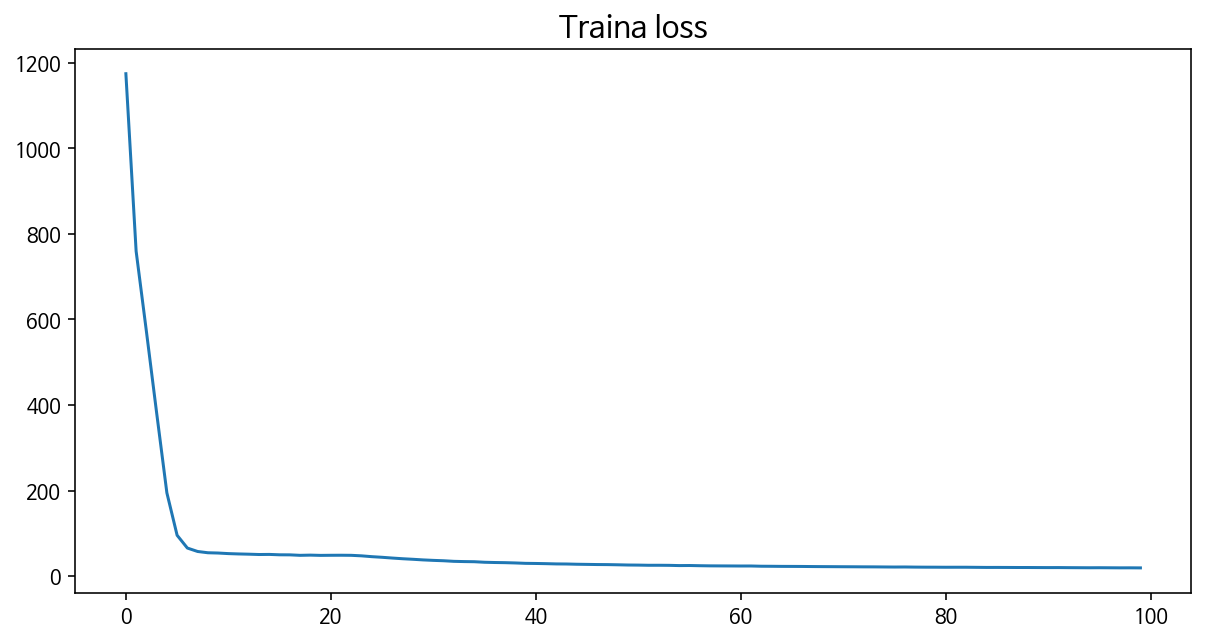

In [72]:
losses_1 = train(transformer, optimizer, enc_train, dec_train, 
                 tokenizer, tokenizer,
                 examples, 20, 256, 100,
                 word_index['<start>'], word_index['<end>'])
show_train_loss(losses_1)

## 결과 확인
---

In [73]:
print_result(transformer, tokenizer, tokenizer, examples,
             n_layers=hyp['n_layers'],
             d_model=hyp['d_model'],
             n_heads=hyp['n_heads'],
             d_ff=hyp['d_ff'],
             dropout=hyp['dropout'],
             warmup_steps=4000,
             batch_size=256,
             epochs=100)

질
1. 지루하다, 놀러가고 싶어.
2. 오늘 일찍 일어났더니 피곤하다.
3. 간만에 여자친구랑 데이트 하기로 했어.
4. 집에 있는다는 소리야.

답
1. 많이 힘들 었 을 거 라 생각 해요 .
2. 정신 차리 ㅂ시오 .
3. 떨리 는 편 이 맞 는 편 이 에요 .
4. 우연 한 시간 이 참 는 건 어떨까 요 .

Hyperparameters
n_layers: 2
d_model: 512
n_heads: 8
d_ff: 2048
dropout: 0.3

Training Parameters
Warmup Steps: 4000
Batch Size: 256
Epoch At: 100


In [74]:
translate('안녕', transformer, tokenizer, tokenizer, 3, 4)

질 : 안녕
답 : 안녕 시키 세요 .


['안녕 시키 세요 .']

In [103]:
translate('땀을 식혀주세요', transformer, tokenizer, tokenizer, 3, 4)

질 : 땀을 식혀주세요
답 : 지금 은 항상 힘들 죠 .


['지금 은 항상 힘들 죠 .']

In [102]:
total_score = validate(transformer, enc_val, dec_val, tokenizer)
print(f'bleu score: {total_score})

  0%|          | 0/449 [00:00<?, ?it/s]

0.00033973741190842897


In [99]:
# idx = 15
# test_enc_sentence = tokenizer.sequences_to_texts([enc_val[idx]])[0]
# print(test_enc_sentence)

# test_dec_tensor = dec_val[idx]
# test_dec_sentence = tokenizer.sequences_to_texts([test_dec_tensor])[0]
# _idx = test_dec_sentence.find("<eos>")
# test_dec_sentence = test_dec_sentence[6:_idx]


# ids = beam_search_decoder(
#     test_enc_sentence,
#     transformer, tokenizer, tokenizer,
#     enc_tensor.shape[-1], dec_tensor.shape[-1],
#     beam_size=5
# )

# bleu = beam_bleu(test_dec_sentence, ids, tokenizer, verbose=True)

이제 는 잡 을 수 가 없 네 <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


AttributeError: 'int' object has no attribute 'encode_as_pieces'

In [95]:
# enc_maxlen = enc_tensor.shape[-1]
# dec_maxlen = dec_tensor.shape[-1]

# aver_bleu = 0
# for que in enc_val:
#     ids = beam_search_decoder(
#         que,
#         transformer, tokenizer, tokenizer,
#         enc_maxlen, dec_maxlen,
#         beam_size=5
#     )
    
#     test_dec_sentence = tokenizer.sequences_to_texts([que])[0]
# #     _idx = test_dec_sentence.find("<eos>")
# #     test_dec_sentence = test_dec_sentence[6:_idx]
    
#     aver_bleu += beam_bleu(test_dec_sentence, ids, tokenizer, verbose=False)
    
# print("=" * 100)
# print(f"Test Data BLEU: {aver_bleu:.3f}")
# print("=" * 100)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

## 모형(model) 평가
---
과적합을 막는다던가, 데이터 증강를 하는 등의 시도는 제대로 진행된 것 같습니다.\
그러나 0.00033의 bleuscore는 안 좋은 점수이므로, 좋은 모델을 만들 수 있었던 것은\
아닌 것 같습니다.\

문장은 제대로 만들어졌다는 생각이 들었습니다.


## 회고
---
안 좋은 원인으로 2가지가 생각나는데, 일단 어차피 처리 못 하는 숫자 자료는 전처리에서\
제거하는 것이 더 좋았을 것이라는 생각이 듭니다.\

모델 구성이 잘 안되서 코드를 이곳 저곳에서 붙여서 진행했는데, 이에따라 토큰과 문장을 오가면서 문제가 발생한 것이 아닌가 싶습니다.\

다음 과제에서는 조금 더 시간을 들여서 완성해야겠다고 생각합니다.\